# Laboratorium 1


### Konfiguracja

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random
import math

EPS = 10**(-14)

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


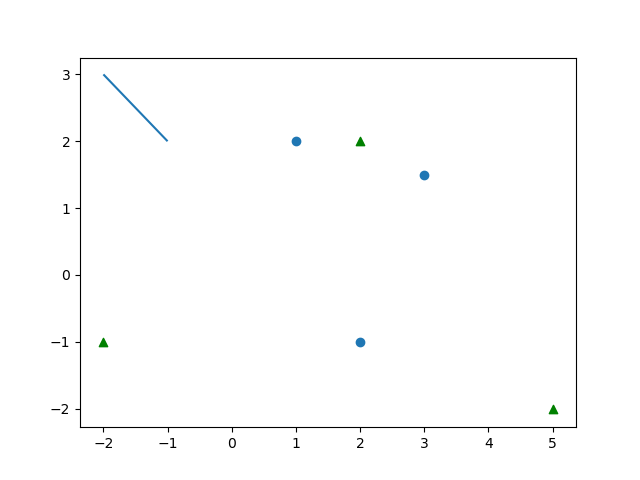

In [3]:
%matplotlib notebook

plot = Plot([
                PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
                 PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")\
            ], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [66]:
%matplotlib notebook

points_A = PointsCollection( [(random.uniform(-1000, 1000), random.uniform(-1000, 1000)) for _ in range(10**5)] )

points_B = PointsCollection( [(random.uniform(-10**14, 10**14), random.uniform(-10**14, 10**14)) for _ in range(10**5)] )

circle_angles = [ random.uniform(0, 2*math.pi) for _ in range(1000) ]
points_C = PointsCollection( [(math.sin(angle) * 100, math.cos(angle) * 100) for angle in circle_angles] )

vec_A = (-1.0, 0.0)
vec_B = (1.0, 0.1)
vec_len = math.sqrt((vec_A[0] - vec_B[0])**2 + (vec_A[1] - vec_B[1])**2)
vec_direction = ((vec_A[0] - vec_B[0]) / vec_len, (vec_A[1] - vec_B[1]) / vec_len)
points_temp_D =  []
count = 0
while(count < 1000):
    rand = random.uniform(-2000, 2000)
    new_point = ( vec_A[0] + rand * vec_direction[0], vec_A[1] + rand * vec_direction[1] )
    if(new_point[0] > 1000 or new_point[0] < -1000 or new_point[1] < -1000 or new_point[1] > 1000):
        pass
    else:
        points_temp_D.append(new_point)
        count+=1
points_D = PointsCollection(points_temp_D)

<IPython.core.display.Javascript object>


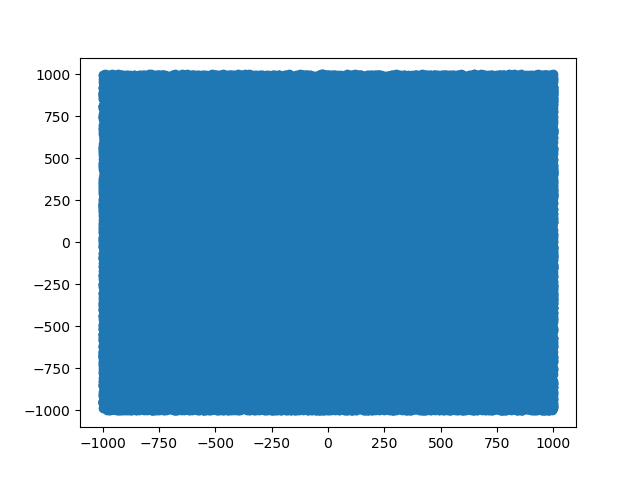

In [48]:
plot_A = Plot([points_A])
plot_A.draw()

<IPython.core.display.Javascript object>


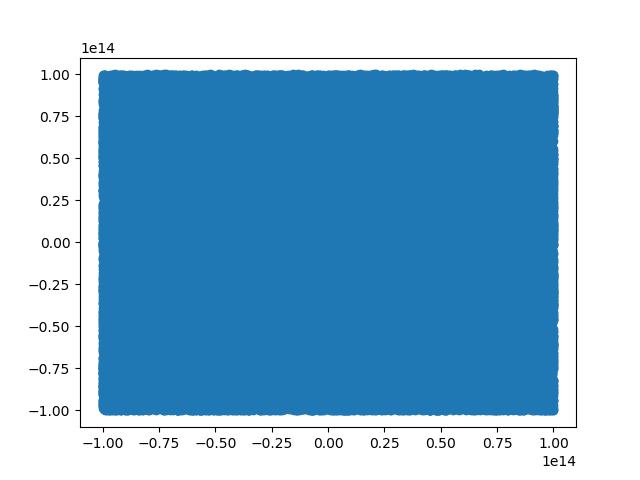

In [49]:
plot_B = Plot([points_B])
plot_B.draw()

<IPython.core.display.Javascript object>


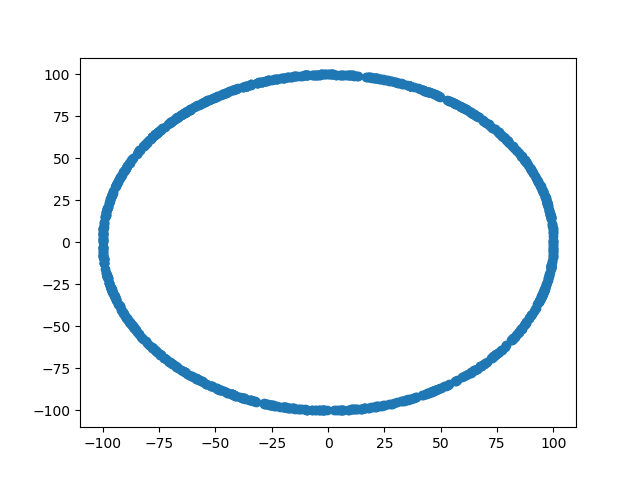

In [50]:
plot_C = Plot([points_C])
plot_C.draw()

<IPython.core.display.Javascript object>


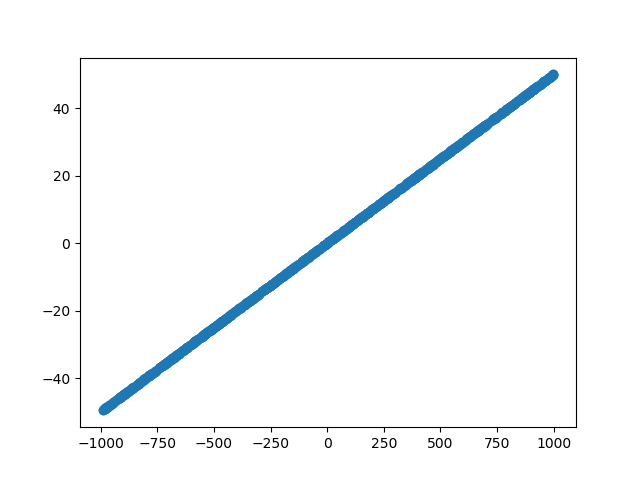

In [67]:
plot_D = Plot([points_D])
plot_D.draw()

In [108]:
def orient_1(poi_A, poi_B, poi_C):
    det = poi_A[0]*poi_B[1] + poi_A[1]*poi_C[0] + poi_B[0]*poi_C[1] 
    det = det - poi_B[1]*poi_C[0] - poi_A[1]*poi_B[0] - poi_A[0]*poi_C[1]
    if det-EPS < 0: return -1
    elif det > 0: return 1
    else: return 0

def orient_2(a, b, c):
    det = (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])
    if det-EPS < 0: return -1
    elif det > 0: return 1
    else: return 0

def orient_3(a, b, c):
    arr = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    det = np.linalg.det(arr)
    if det-EPS < 0: return -1
    elif det > 0: return 1
    else: return 0
    

In [100]:
vec_A = (-1.0, 0.0)
vec_B = (1.0, 0.1)
points_A_left_1 = PointsCollection([(pX, pY) for (pX, pY) in points_A.points if orient_1(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_A_right_1 = PointsCollection([(pX, pY) for (pX, pY) in points_A.points if orient_1(vec_A, vec_B, (pX, pY)) < 0], color = 'red')

Na lewo: 49887
Na prawo: 50113
Suma: 100000


<IPython.core.display.Javascript object>


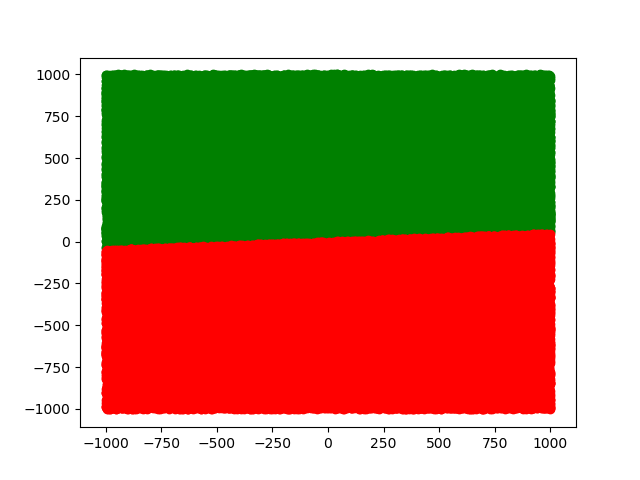

In [101]:
plot_A_1 = Plot([points_A_left_1, points_A_right_1])
print("Na lewo:", len(points_A_left_1.points))
print("Na prawo:", len(points_A_right_1.points))
print("Suma:", len(points_A_left_1.points) + len(points_A_right_1.points))
plot_A_1.draw()

Na lewo: 49887
Na prawo: 50113
Suma: 100000


<IPython.core.display.Javascript object>


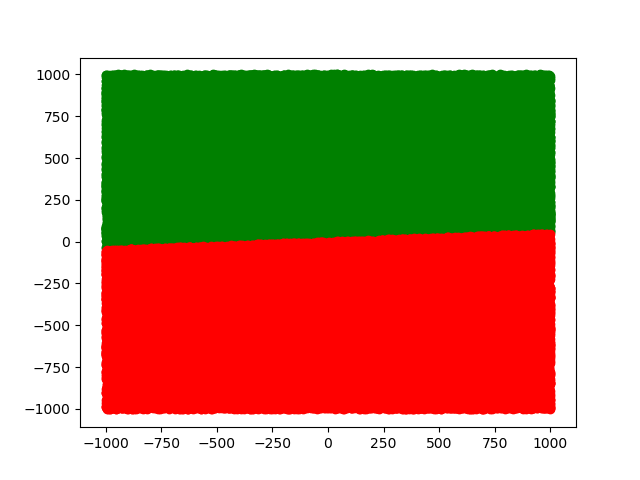

In [102]:
points_A_left_2 = PointsCollection([(pX, pY) for (pX, pY) in points_A.points if orient_2(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_A_right_2 = PointsCollection([(pX, pY) for (pX, pY) in points_A.points if orient_2(vec_A, vec_B, (pX, pY)) < 0], color = 'red')
plot_A_2 = Plot([points_A_left_2, points_A_right_2])
print("Na lewo:", len(points_A_left_2.points))
print("Na prawo:", len(points_A_right_2.points))
print("Suma:", len(points_A_left_2.points) + len(points_A_right_2.points))
plot_A_2.draw()

Na lewo: 468
Na prawo: 532
Suma: 1000


<IPython.core.display.Javascript object>


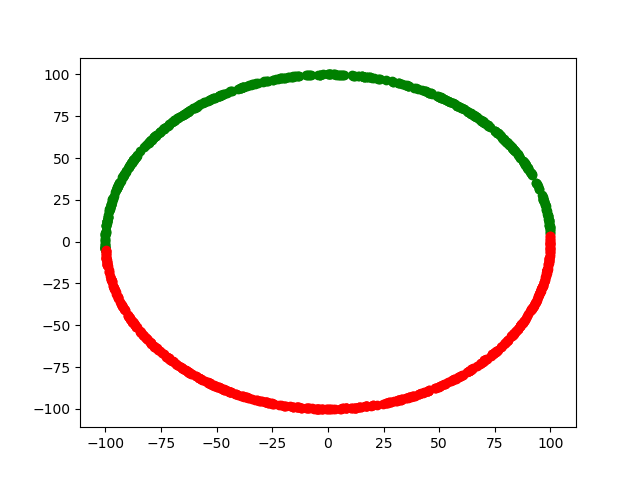

In [103]:
points_C_left_1 = PointsCollection([(pX, pY) for (pX, pY) in points_C.points if orient_1(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_C_right_1 = PointsCollection([(pX, pY) for (pX, pY) in points_C.points if orient_1(vec_A, vec_B, (pX, pY)) < 0], color = 'red')
plot_C_1 = Plot([points_C_left_1, points_C_right_1])
print("Na lewo:", len(points_C_left_1.points))
print("Na prawo:", len(points_C_right_1.points))
print("Suma:", len(points_C_left_1.points) + len(points_C_right_1.points))
plot_C_1.draw()

Na lewo: 468
Na prawo: 532
Suma: 1000


<IPython.core.display.Javascript object>


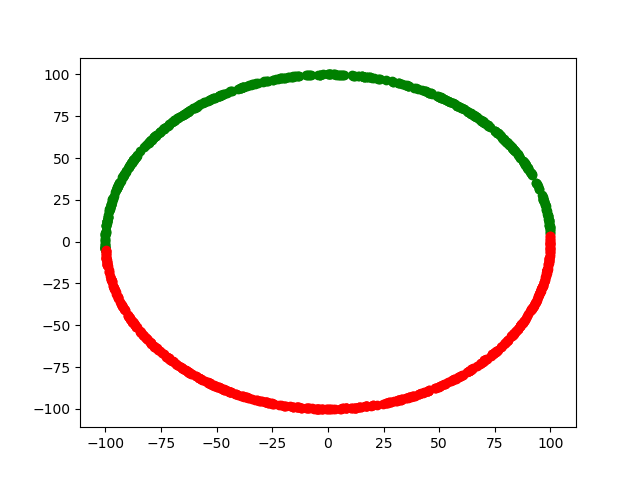

In [104]:
points_C_left_2 = PointsCollection([(pX, pY) for (pX, pY) in points_C.points if orient_2(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_C_right_2 = PointsCollection([(pX, pY) for (pX, pY) in points_C.points if orient_2(vec_A, vec_B, (pX, pY)) < 0], color = 'red')
plot_C_2 = Plot([points_C_left_2, points_C_right_2])
print("Na lewo:", len(points_C_left_2.points))
print("Na prawo:", len(points_C_right_2.points))
print("Suma:", len(points_C_left_2.points) + len(points_C_right_2.points))
plot_C_2.draw()

Na lewo: 10
Na prawo: 990
Suma: 1000


<IPython.core.display.Javascript object>


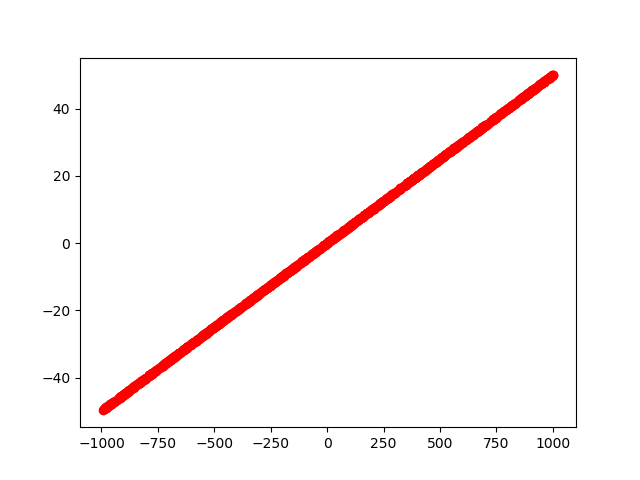

In [109]:
points_D_left_1 = PointsCollection([(pX, pY) for (pX, pY) in points_D.points if orient_1(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_D_right_1 = PointsCollection([(pX, pY) for (pX, pY) in points_D.points if orient_1(vec_A, vec_B, (pX, pY)) < 0], color = 'red')
plot_D_1 = Plot([points_D_left_1, points_D_right_1])
print("Na lewo:", len(points_D_left_1.points))
print("Na prawo:", len(points_D_right_1.points))
print("Suma:", len(points_D_left_1.points) + len(points_D_right_1.points))
plot_D_1.draw()

Na lewo: 123
Na prawo: 877
Suma: 1000


<IPython.core.display.Javascript object>


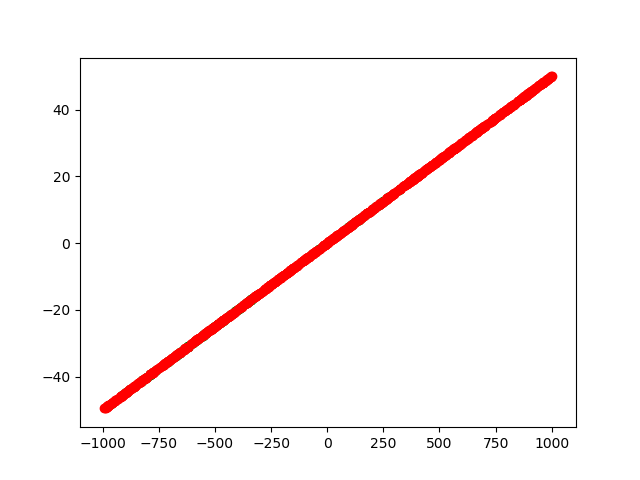

In [110]:
points_D_left_2 = PointsCollection([(pX, pY) for (pX, pY) in points_D.points if orient_2(vec_A, vec_B, (pX, pY)) > 0], color = 'green')
points_D_right_2 = PointsCollection([(pX, pY) for (pX, pY) in points_D.points if orient_2(vec_A, vec_B, (pX, pY)) < 0], color = 'red')
plot_D_2 = Plot([points_D_left_2, points_D_right_2])
print("Na lewo:", len(points_D_left_2.points))
print("Na prawo:", len(points_D_right_2.points))
print("Suma:", len(points_D_left_2.points) + len(points_D_right_2.points))
plot_D_2.draw()